In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [200]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


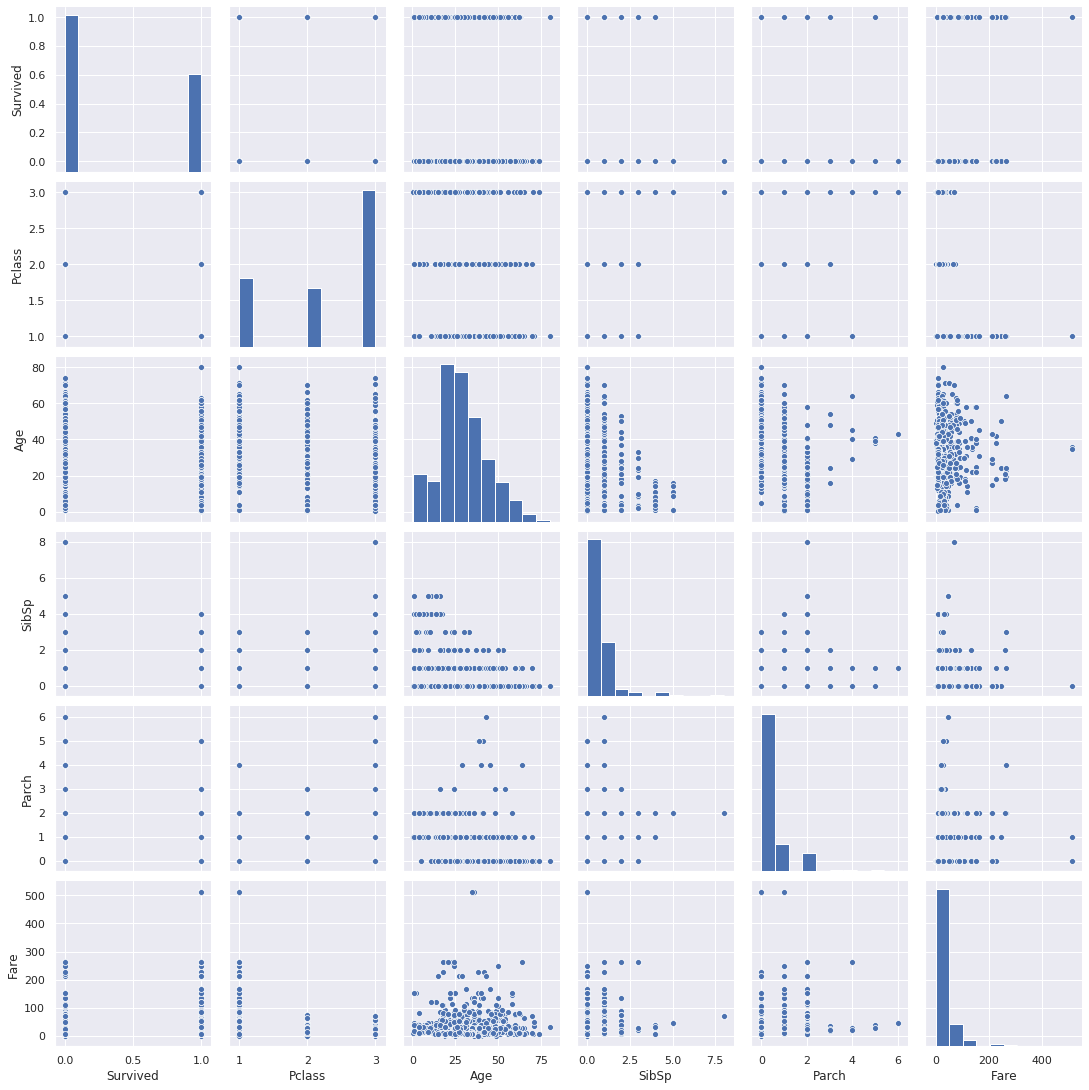

In [202]:
sns.pairplot(df.drop('PassengerId',axis=1))

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


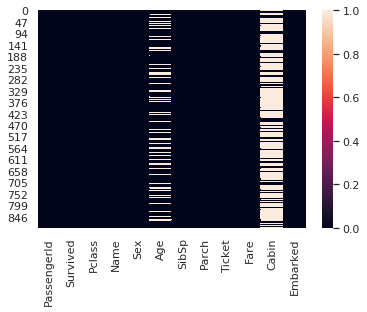

In [205]:
sns.heatmap(df.isnull())

In [206]:
#Pencentage of missing values in the dataframe
(df.isnull().sum()*100)/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [207]:
#Cabin has to much missing information. I find that dropping it will be better
df.drop('Cabin',axis=1,inplace=True)

#Doing the same for test dataset
df_test.drop('Cabin',axis=1,inplace=True)

In [208]:
df['Last Name']=df['Name'].apply(lambda name:name.split(',')[0])

In [209]:
df[df['Last Name']=='Abelson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0,C,Abelson
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0,C,Abelson


In [210]:
family_survival=df.groupby('Last Name')[['Survived']].sum()

In [211]:
family_survival

,Survived
Last Name,
Abbing,0
Abbott,1
Abelson,1
Adahl,0
Adams,0
...,...
de Mulder,1
de Pelsmaeker,0
del Carlo,0


In [212]:
family_survival['number of people']=df.groupby('Last Name').count()['PassengerId']

In [213]:
family_survival['ratio survived']=family_survival['Survived']/family_survival['number of people']

In [214]:
family_survival.head()

,Survived,number of people,ratio survived
Last Name,,,
Abbing,0,1,0.0
Abbott,1,2,0.5
Abelson,1,2,0.5
Adahl,0,1,0.0
Adams,0,1,0.0


In [215]:
family_survival['number of people'].value_counts()

1    534
2     83
3     28
4     14
6      5
9      1
7      1
5      1
Name: number of people, dtype: int64

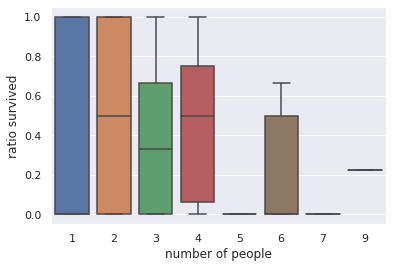

In [216]:
sns.boxplot(x='number of people',y='ratio survived', data=family_survival)

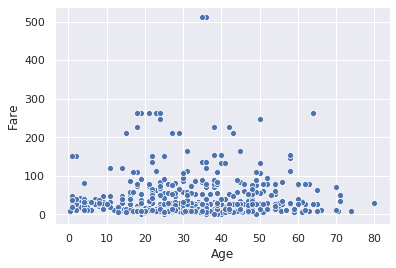

In [217]:
sns.scatterplot(x='Age',y='Fare',data=df)

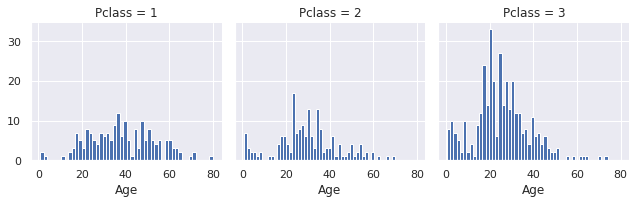

In [218]:
g=sns.FacetGrid(df,col='Pclass')
g.map(plt.hist,'Age',bins=50)

In [219]:
df['Name'].apply(lambda name:name.split(',')[1].split('.')[0])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 891, dtype: object

In [220]:
df['title name']=df['Name'].apply(lambda name:name.split(',')[1].split('.')[0])

In [221]:
other_titles=df['title name'].value_counts().index[4:].values

In [222]:
df[df['title name'].isin(other_titles)].groupby('title name').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
title name,,,,,,,,
Capt,1.0,70.000000,NaN,70.0,70.00,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.0,57.00,58.0,59.00,60.0
Don,1.0,40.000000,NaN,40.0,40.00,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.0,35.00,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.0,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.0,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.0,46.75,48.5,50.25,52.0
Mlle,2.0,24.000000,0.000000,24.0,24.00,24.0,24.00,24.0
Mme,1.0,24.000000,NaN,24.0,24.00,24.0,24.00,24.0


In [223]:
df['title name'] = df['title name'].replace('Mlle', 'Miss')
df['title name'] = df['title name'].replace('Ms', 'Miss')
df['title name'] = df['title name'].replace('Mme', 'Mrs')
df['title name']=df['title name'].replace(other_titles,'Rare')

In [224]:
#Doing the same for test
df_test['title name']=df_test['Name'].apply(lambda name:name.split(',')[1].split('.')[0])
other_titles=df_test['title name'].value_counts().index[4:].values
df_test[df_test['title name'].isin(other_titles)].groupby('title name').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
title name,,,,,,,,
Col,2.0,50.0,4.242641,47.0,48.50,50.0,51.50,53.0
Dona,1.0,39.0,NaN,39.0,39.00,39.0,39.00,39.0
Dr,1.0,53.0,NaN,53.0,53.00,53.0,53.00,53.0
Ms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rev,2.0,35.5,7.778175,30.0,32.75,35.5,38.25,41.0


In [225]:
df_test['title name'] = df_test['title name'].replace('Mlle', 'Miss')
df_test['title name'] = df_test['title name'].replace('Ms', 'Miss')
df_test['title name'] = df_test['title name'].replace('Mme', 'Mrs')
df_test['title name']=df_test['title name'].replace(other_titles,'Rare')

In [226]:
df_test['title name'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
Rare         7
Name: title name, dtype: int64

In [227]:
df['title name'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Rare        27
Name: title name, dtype: int64

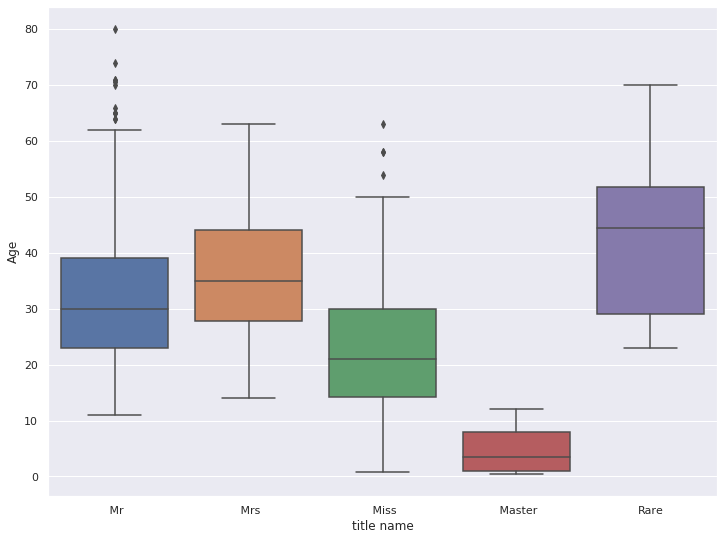

In [228]:
plt.figure(figsize=(12,9))
sns.boxplot(x='title name', y='Age', data=df)

In [229]:
df['Age'] = df.groupby('title name')['Age'].apply(lambda x: x.fillna(x.mean()))
#Doing the same for test dataset
df_test['Age'] = df_test.groupby('title name')['Age'].apply(lambda x: x.fillna(x.mean()))

In [230]:
df['Age'] = df['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [231]:
 # Mapping Age
df.loc[ df['Age'] <= 16, 'Age']= 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4 ;

df_test.loc[ df_test['Age'] <= 16, 'Age']= 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 32), 'Age'] = 1
df_test.loc[(df_test['Age'] > 32) & (df_test['Age'] <= 48), 'Age'] = 2
df_test.loc[(df_test['Age'] > 48) & (df_test['Age'] <= 64), 'Age'] = 3
df_test.loc[ df_test['Age'] > 64, 'Age'] = 4 ;


In [232]:
# Mapping titles
title_mapping = {" Mr": 1, " Miss": 2, " Mrs": 3, " Master": 4, "Rare": 5}
df['title name'] = df['title name'].map(title_mapping)
df['title name'] = df['title name'].fillna(0)

df_test['title name'] = df_test['title name'].map(title_mapping)
df_test['title name'] = df_test['title name'].fillna(0)

In [233]:
# Mapping Embarked
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [234]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df_test['Fare'] = df_test['Fare'].fillna(df['Fare'].median())
# Mapping Fare
df.loc[ df['Fare'] <= 7.91, 'Fare']= 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare']= 3
df['Fare'] = df['Fare'].astype(int)

df_test.loc[ df['Fare'] <= 7.91, 'Fare']= 0
df_test.loc[(df['Fare'] > 7.91) & (df_test['Fare'] <= 14.454), 'Fare'] = 1
df_test.loc[(df['Fare'] > 14.454) & (df_test['Fare'] <= 31), 'Fare']   = 2
df_test.loc[ df_test['Fare'] > 31, 'Fare']= 3
df_test['Fare'] = df_test['Fare'].astype(int)

In [235]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,title name
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,0,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,1,Cumings,3
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,0,Heikkinen,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,0,Futrelle,3
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,0,Allen,1


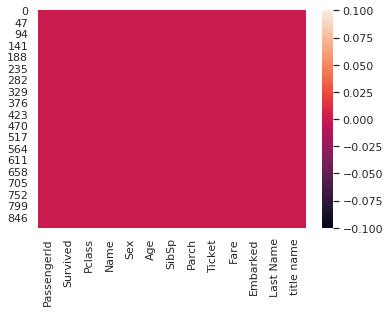

In [236]:
sns.heatmap(df.isnull())

In [237]:
(df.isnull().sum()*100)/df.shape[0]

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Last Name      0.0
title name     0.0
dtype: float64

In [239]:
df_test.shape

(418, 11)

In [240]:
(df_test.isnull().sum()*100)/df_test.shape[0]

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
title name     0.0
dtype: float64

In [241]:
(df_test.isnull().sum()*100)/df_test.shape[0]

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
title name     0.0
dtype: float64

In [242]:
df['size of family'] = df['SibSp'] + df['Parch'] + 1
df.drop('SibSp',inplace=True,axis=1)

df_test['size of family'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test.drop('SibSp',inplace=True,axis=1)

In [243]:
df['is alone']=df.apply((lambda row: 1 if (row['size of family']==1) else 0),axis=1)
df_test['is alone']=df_test.apply((lambda row: 1 if (row['size of family']==1) else 0),axis=1)

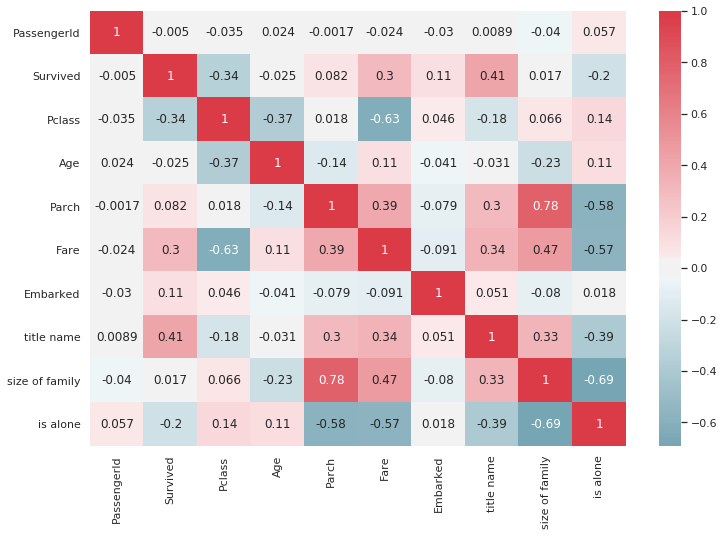

In [244]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap = sns.diverging_palette(220, 10, as_cmap=True),center=0,annot=True)

In [245]:
features=['Pclass','Sex','Age','Fare','Embarked','title name', 'size of family', 'is alone', 'Survived']
df_dummies= pd.get_dummies(df[features])
features=['Pclass','Sex','Age','Fare','Embarked','title name','size of family', 'is alone']
df_dummies_test = pd.get_dummies(df_test[features])

In [246]:
df_dummies.head()

,Pclass,Age,Fare,Embarked,title name,size of family,is alone,Survived,Sex_female,Sex_male
0,3,1,0,0,1,2,0,0,0,1
1,1,2,3,1,3,2,0,1,1,0
2,3,1,1,0,2,1,1,1,1,0
3,1,2,3,0,3,2,0,1,1,0
4,3,2,1,0,1,1,1,0,0,1


In [248]:
# df_dummies.drop(['Sex_male','Embarked_S','title name_Rare'],axis=1,inplace=True)

In [249]:
# df_dummies_test.drop(['Sex_male','Embarked_S','title name_Rare'],axis=1,inplace=True)

In [251]:
df_dummies_test.head()

,Pclass,Age,Fare,Embarked,title name,size of family,is alone,Sex_female,Sex_male
0,3,2,0,2,1,1,1,0,1
1,3,2,0,0,3,2,0,1,0
2,2,3,0,2,1,1,1,0,1
3,3,1,0,0,1,1,1,0,1
4,3,1,0,0,3,3,0,1,0


## Split Data

In [293]:
from sklearn.model_selection import train_test_split
X = df_dummies.drop('Survived',axis=1).values
y = df_dummies['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Scale data

In [294]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [295]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [296]:
X_train.shape

(596, 9)

In [297]:
X_test.shape

(295, 9)

In [358]:
model= Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=35,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [359]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

In [360]:
model.fit(x=X_train, 
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 596 samples, validate on 295 samples
Epoch 1/600
596/596 [==============================] - 1s 1ms/sample - loss: 0.6803 - val_loss: 0.6277
Epoch 2/600
596/596 [==============================] - 0s 164us/sample - loss: 0.6365 - val_loss: 0.5766
Epoch 3/600
596/596 [==============================] - 0s 156us/sample - loss: 0.6098 - val_loss: 0.5319
Epoch 4/600
596/596 [==============================] - 0s 152us/sample - loss: 0.5764 - val_loss: 0.4906
Epoch 5/600
596/596 [==============================] - 0s 170us/sample - loss: 0.5495 - val_loss: 0.4623
Epoch 6/600
596/596 [==============================] - 0s 137us/sample - loss: 0.5491 - val_loss: 0.4460
Epoch 7/600
596/596 [==============================] - 0s 165us/sample - loss: 0.5391 - val_loss: 0.4374
Epoch 8/600
596/596 [==============================] - 0s 161us/sample - loss: 0.5200 - val_loss: 0.4342
Epoch 9/600
596/596 [==============================] - 0s 186us/sample - loss: 0.5280 - val_loss: 0.4358
Epoch 10/60

Epoch 78/600
596/596 [==============================] - 0s 203us/sample - loss: 0.4160 - val_loss: 0.3774
Epoch 79/600
596/596 [==============================] - 0s 210us/sample - loss: 0.4289 - val_loss: 0.3795
Epoch 80/600
596/596 [==============================] - 0s 122us/sample - loss: 0.4186 - val_loss: 0.3764
Epoch 81/600
596/596 [==============================] - 0s 142us/sample - loss: 0.4387 - val_loss: 0.3820
Epoch 82/600
596/596 [==============================] - 0s 124us/sample - loss: 0.4331 - val_loss: 0.3781
Epoch 83/600
596/596 [==============================] - 0s 121us/sample - loss: 0.4391 - val_loss: 0.3793
Epoch 84/600
596/596 [==============================] - 0s 124us/sample - loss: 0.4329 - val_loss: 0.3790
Epoch 85/600
596/596 [==============================] - 0s 116us/sample - loss: 0.4222 - val_loss: 0.3810
Epoch 86/600
596/596 [==============================] - 0s 132us/sample - loss: 0.4365 - val_loss: 0.3814
Epoch 87/600
596/596 [========================

Epoch 155/600
596/596 [==============================] - 0s 159us/sample - loss: 0.4188 - val_loss: 0.3739
Epoch 156/600
596/596 [==============================] - 0s 133us/sample - loss: 0.4066 - val_loss: 0.3736
Epoch 157/600
596/596 [==============================] - 0s 159us/sample - loss: 0.3947 - val_loss: 0.3733
Epoch 158/600
596/596 [==============================] - 0s 148us/sample - loss: 0.4135 - val_loss: 0.3697
Epoch 159/600
596/596 [==============================] - 0s 161us/sample - loss: 0.4133 - val_loss: 0.3734
Epoch 160/600
596/596 [==============================] - 0s 128us/sample - loss: 0.4116 - val_loss: 0.3687
Epoch 161/600
596/596 [==============================] - 0s 156us/sample - loss: 0.4040 - val_loss: 0.3684
Epoch 162/600
596/596 [==============================] - 0s 129us/sample - loss: 0.4125 - val_loss: 0.3681
Epoch 163/600
596/596 [==============================] - 0s 147us/sample - loss: 0.4200 - val_loss: 0.3713
Epoch 164/600
596/596 [==============

596/596 [==============================] - 0s 186us/sample - loss: 0.4076 - val_loss: 0.3690
Epoch 232/600
596/596 [==============================] - 0s 144us/sample - loss: 0.3970 - val_loss: 0.3664
Epoch 233/600
596/596 [==============================] - 0s 156us/sample - loss: 0.4027 - val_loss: 0.3712
Epoch 234/600
596/596 [==============================] - 0s 146us/sample - loss: 0.4031 - val_loss: 0.3659
Epoch 235/600
596/596 [==============================] - 0s 168us/sample - loss: 0.3801 - val_loss: 0.3645
Epoch 236/600
596/596 [==============================] - 0s 144us/sample - loss: 0.3963 - val_loss: 0.3657
Epoch 237/600
596/596 [==============================] - 0s 149us/sample - loss: 0.4046 - val_loss: 0.3690
Epoch 238/600
596/596 [==============================] - 0s 120us/sample - loss: 0.3929 - val_loss: 0.3723
Epoch 239/600
596/596 [==============================] - 0s 167us/sample - loss: 0.3968 - val_loss: 0.3701
Epoch 240/600
596/596 [============================

596/596 [==============================] - 0s 187us/sample - loss: 0.3825 - val_loss: 0.3642
Epoch 308/600
596/596 [==============================] - 0s 148us/sample - loss: 0.3785 - val_loss: 0.3711
Epoch 309/600
596/596 [==============================] - 0s 167us/sample - loss: 0.3822 - val_loss: 0.3673
Epoch 310/600
596/596 [==============================] - 0s 143us/sample - loss: 0.4015 - val_loss: 0.3685
Epoch 311/600
596/596 [==============================] - 0s 147us/sample - loss: 0.3768 - val_loss: 0.3689
Epoch 312/600
596/596 [==============================] - 0s 156us/sample - loss: 0.3913 - val_loss: 0.3762
Epoch 313/600
596/596 [==============================] - 0s 156us/sample - loss: 0.3789 - val_loss: 0.3718
Epoch 314/600
596/596 [==============================] - 0s 148us/sample - loss: 0.3816 - val_loss: 0.3657
Epoch 315/600
596/596 [==============================] - 0s 155us/sample - loss: 0.3968 - val_loss: 0.3666
Epoch 316/600
596/596 [============================

In [368]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,max_depth=12)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [369]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluation

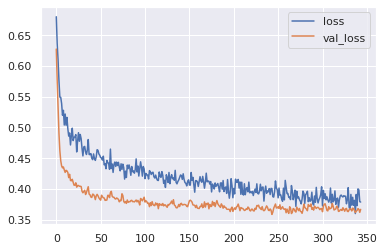

In [370]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [371]:
# 

In [372]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions),'\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       185
           1       0.88      0.65      0.75       110

    accuracy                           0.84       295
   macro avg       0.85      0.80      0.81       295
weighted avg       0.84      0.84      0.83       295
 

[[175  10]
 [ 38  72]]


In [373]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions),'\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       185
           1       0.85      0.70      0.77       110

    accuracy                           0.84       295
   macro avg       0.84      0.81      0.82       295
weighted avg       0.84      0.84      0.84       295
 

[[171  14]
 [ 33  77]]


In [374]:
predictions = logreg.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions),'\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       185
           1       0.79      0.74      0.76       110

    accuracy                           0.83       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.83      0.83      0.83       295
 

[[163  22]
 [ 29  81]]


## Output

In [323]:
df_dummies_test.head()

,Pclass,Age,Fare,size of family,is alone,Sex_female,Embarked_C,Embarked_Q,title name_ Master,title name_ Miss,title name_ Mr,title name_ Mrs
0,3,34.5,7.8292,1,1,0,0,1,0,0,1,0
1,3,47.0,7.0000,2,0,1,0,0,0,0,0,1
2,2,62.0,9.6875,1,1,0,0,1,0,0,1,0
3,3,27.0,8.6625,1,1,0,0,0,0,0,1,0
4,3,22.0,12.2875,3,0,1,0,0,0,0,0,1


In [384]:
X_val = scaler.transform(df_dummies_test.values)
predictions = model.predict_classes(X_val)

In [403]:
# np.hstack(predictions)

In [404]:
# df_test['PassengerId'].values

In [397]:
output = pd.DataFrame(columns=['PassengerId','Survived'],data=zip(df_test['PassengerId'].values,np.hstack(predictions)))

In [398]:
before=pd.read_csv('my_submission.csv')

In [399]:
before.columns=['PassengerId','Survived_before']

In [400]:
before.reset_index(inplace=True,drop=True)

In [401]:
output.reset_index(inplace=True,drop=True)

In [406]:
compare=pd.concat([before,output],axis=1)

In [409]:
compare[compare['Survived_before']!=compare['Survived']].count()

PassengerId        35
Survived_before    35
PassengerId        35
Survived           35
dtype: int64

In [410]:
output.to_csv('my_submission.csv', index=False)